### adjustor.pyの使い方の例

In [6]:
import pandas as pd
from adjustor import Adjustor

In [8]:
#ファイルの読み込み
filename = "./sum.hdf5"
store = pd.HDFStore(filename)
df = store['consequence']

etfs = df['topix'].astype('float').values
navs = df['calc'].astype('float').values
times = df['time'].astype('datetime64').values

In [14]:
adjustor = Adjustor()

order_flag = False
position = 0
profits = []
adjusted_nav = 0
etf_before = 0
for etf, nav in zip(etfs, navs):
    # 保有量と価格変動に応じた利益を得る
    profits.append(position * (etf - etf_before))
    
    if order_flag:
        # 前回計算したNAVが異常値でなかったら
        # adjusted_nav_beforeを基準値にスナイパー注文
        position = 1 if etf < adjusted_nav else -1
    
    # navを補正する
    order_flag, adjusted_nav = adjustor.feed(etf, nav)
    
    etf_before = etf
    
profits = np.asarray(profits)

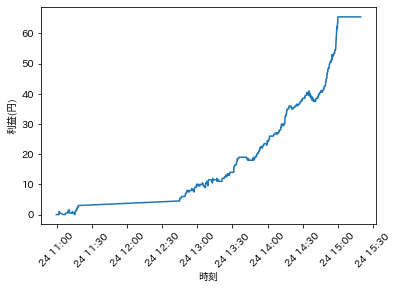

In [19]:
from matplotlib import pyplot as plt
import japanize_matplotlib

plt.xticks(rotation=45)
plt.xlabel('時刻')
plt.ylabel('利益(円)')
plt.plot(times, np.cumsum(profits))